In [3]:
import pandas as pd
df = pd.read_csv('compare_contrast.csv',index_col=(0,1,2),header=0).astype(float)
df = df.reset_index()
df['index'] = df[['metric', 'dataset']].apply(lambda x: '-'.join(x), axis=1)
df['index'].unique()
df['mean'] = df.mean(axis=1)
df = df.sort_values(by='mean')
df = df[['index','dataset','method','metric','mean']]
df

,index,dataset,method,metric,mean
7,MAE-VAN,VAN,Frobenius norm,MAE,0.819250
11,MAE-VAN,VAN,Inner product,MAE,0.820250
9,MAE-VAN,VAN,No contrast,MAE,0.827975
6,RMSE-VAN,VAN,Frobenius norm,RMSE,1.500700
10,RMSE-VAN,VAN,Inner product,RMSE,1.505075
8,RMSE-VAN,VAN,No contrast,RMSE,1.512000
1,MAE-SF,SF,Frobenius norm,MAE,1.576200
5,MAE-SF,SF,Inner product,MAE,1.593525
3,MAE-SF,SF,No contrast,MAE,1.610875
0,RMSE-SF,SF,Frobenius norm,RMSE,2.682175


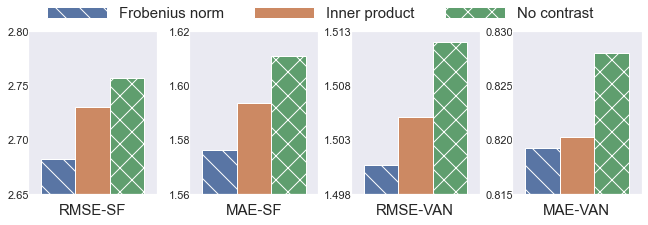

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)
sns.set_style("dark")
fig, axs = plt.subplots(1,4,figsize=(11,3.0))
y_lims = [(2.65,2.8),(1.56,1.62),(1.498,1.513),(0.815,0.83)]
y_ticks=[[2.65,2.7,2.75,2.8],[1.56,1.58,1.60,1.62],
         [1.498,1.503,1.508,1.513],[0.815,0.82,0.825,0.83]]
hatches = ['\\','','x']
i=0
for ax,idx in zip(axs,['RMSE-SF','MAE-SF', 'RMSE-VAN','MAE-VAN']):
    g = sns.barplot(x="index", y='mean', hue="method",
                data=df[df['index']==idx],
                ax=ax)

    for b,bar in enumerate(g.patches):
        bar.set_hatch(hatches[b])
    ax.set_ylim(y_lims[i])
    ax.set_yticks(y_ticks[i])
    ax.yaxis.set_tick_params(rotation=0,pad=-7,labelsize=11)
    ax.set_ylabel('')
    ax.set_xlabel('')
    i+=1
    ax.legend(bbox_to_anchor=(-3.6, 1.15),
              ncol=3, loc=2, handlelength=4,
              borderaxespad=0,fontsize=20,
              prop={'size':15},frameon=False,
              labelspacing=1,borderpad=0)
    ax.set_xticklabels(ax.get_xticklabels(),size=15)
    if i !=4:
        ax.legend([],[], frameon=False)
    # ax.grid(False)
# plt.tight_layout()
plt.subplots_adjust(left=None,
                bottom=None,
                right=None,
                top=None,
                wspace=0.25,
                hspace=0)

plt.savefig('figures/compare_contrast_all.pdf', bbox_inches='tight')
plt.show()